In [7]:
## General imports

import numpy as np
import torch
import torch.nn as nn

In [8]:
## Notebook config
use_saved_model_if_exists = False
save_trained_model = True
model_saving_path = "./models/cnn_autoencoder.pt"

In [9]:
# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
is_device_cuda = device=="cuda"
print(f"Device is {device}")

Device is cuda


In [10]:
from data_loading import get_MNIST_train_validation_test_dataloaders

train_dataloader, _, test_dataloader = get_MNIST_train_validation_test_dataloaders(
    batch_size_train=64,
    batch_size_test=1,
    train_split=0.0, # Don't use a validation set
    use_cuda=is_device_cuda,
)

In [11]:
## Model training
import os
from autoencoder import get_cnn_mnist_autoencoder
from training import train_autoencoder

model = get_cnn_mnist_autoencoder()
if use_saved_model_if_exists and os.path.exists(model_saving_path):
    model.load_state_dict(torch.load(model_saving_path))
    model.to(device)
else:
    model.to(device)
    train_autoencoder(
        model=model,
        optimizer=torch.optim.Adam(model.parameters(), lr=1e-3),
        criterion=nn.MSELoss(),
        dataloader=train_dataloader,
        epochs=30,
        device=device,
    )

    if save_trained_model:
        torch.save(model.state_dict(), model_saving_path)


  3%|▎         | 1/30 [00:03<01:33,  3.23s/it]

--- Iteration 1: training loss = 0.0350 ---


  7%|▋         | 2/30 [00:06<01:28,  3.15s/it]

--- Iteration 2: training loss = 0.0166 ---


 10%|█         | 3/30 [00:09<01:25,  3.16s/it]

--- Iteration 3: training loss = 0.0118 ---


 13%|█▎        | 4/30 [00:12<01:22,  3.16s/it]

--- Iteration 4: training loss = 0.0094 ---


 17%|█▋        | 5/30 [00:15<01:19,  3.16s/it]

--- Iteration 5: training loss = 0.0081 ---


 20%|██        | 6/30 [00:18<01:15,  3.16s/it]

--- Iteration 6: training loss = 0.0073 ---


 23%|██▎       | 7/30 [00:22<01:12,  3.16s/it]

--- Iteration 7: training loss = 0.0068 ---


 27%|██▋       | 8/30 [00:25<01:09,  3.17s/it]

--- Iteration 8: training loss = 0.0065 ---


 30%|███       | 9/30 [00:28<01:06,  3.15s/it]

--- Iteration 9: training loss = 0.0062 ---


 33%|███▎      | 10/30 [00:31<01:02,  3.14s/it]

--- Iteration 10: training loss = 0.0060 ---


 37%|███▋      | 11/30 [00:34<00:59,  3.13s/it]

--- Iteration 11: training loss = 0.0059 ---


 40%|████      | 12/30 [00:37<00:56,  3.13s/it]

--- Iteration 12: training loss = 0.0057 ---


 43%|████▎     | 13/30 [00:40<00:53,  3.13s/it]

--- Iteration 13: training loss = 0.0057 ---


 47%|████▋     | 14/30 [00:44<00:50,  3.14s/it]

--- Iteration 14: training loss = 0.0056 ---


 50%|█████     | 15/30 [00:47<00:47,  3.14s/it]

--- Iteration 15: training loss = 0.0055 ---


 53%|█████▎    | 16/30 [00:50<00:43,  3.13s/it]

--- Iteration 16: training loss = 0.0054 ---


 57%|█████▋    | 17/30 [00:53<00:41,  3.16s/it]

--- Iteration 17: training loss = 0.0053 ---


 60%|██████    | 18/30 [00:56<00:37,  3.16s/it]

--- Iteration 18: training loss = 0.0053 ---


 63%|██████▎   | 19/30 [00:59<00:34,  3.14s/it]

--- Iteration 19: training loss = 0.0052 ---


 67%|██████▋   | 20/30 [01:02<00:31,  3.15s/it]

--- Iteration 20: training loss = 0.0052 ---


 70%|███████   | 21/30 [01:06<00:28,  3.14s/it]

--- Iteration 21: training loss = 0.0051 ---


 73%|███████▎  | 22/30 [01:09<00:24,  3.12s/it]

--- Iteration 22: training loss = 0.0051 ---


 77%|███████▋  | 23/30 [01:12<00:21,  3.13s/it]

--- Iteration 23: training loss = 0.0050 ---


 80%|████████  | 24/30 [01:15<00:18,  3.14s/it]

--- Iteration 24: training loss = 0.0050 ---


 83%|████████▎ | 25/30 [01:18<00:15,  3.14s/it]

--- Iteration 25: training loss = 0.0050 ---


 87%|████████▋ | 26/30 [01:21<00:12,  3.13s/it]

--- Iteration 26: training loss = 0.0049 ---


 90%|█████████ | 27/30 [01:24<00:09,  3.13s/it]

--- Iteration 27: training loss = 0.0049 ---


 93%|█████████▎| 28/30 [01:28<00:06,  3.14s/it]

--- Iteration 28: training loss = 0.0049 ---


 97%|█████████▋| 29/30 [01:31<00:03,  3.14s/it]

--- Iteration 29: training loss = 0.0048 ---


100%|██████████| 30/30 [01:34<00:00,  3.14s/it]

--- Iteration 30: training loss = 0.0048 ---


MSE is 0.0051001594401896


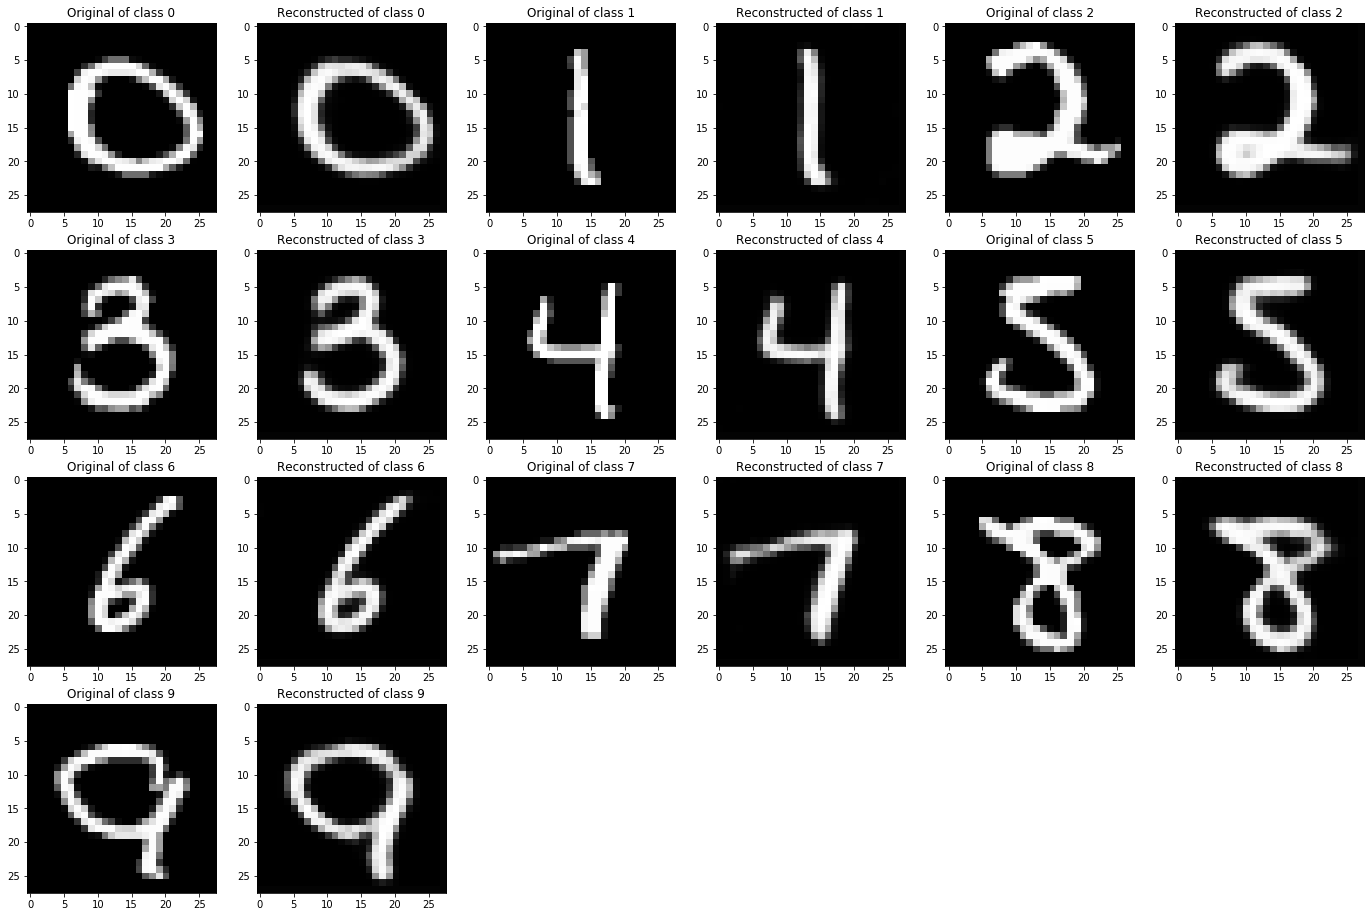

In [12]:
## Model evaluation
from evaluation import get_autoencoder_original_reconstructed_pairs, plot_original_reconstructed_per_class_grayscale

originals, reconstructed, labels = get_autoencoder_original_reconstructed_pairs(model, test_dataloader, device)

mse = np.mean(np.square(originals - reconstructed))
print(f"MSE is {mse}")

plot_original_reconstructed_per_class_grayscale(
    originals, reconstructed, torch.Tensor(labels), subplot_shape=(4,6), figsize=(24,16)
)